In [3]:
import pandas as pd 
df = pd.read_csv('C:/UAS MECHINE LEARNING/K-MEANS/housing.csv', usecols = 
['longitude', 'latitude', 'median_house_value']) 
df.head() 

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[['latitude', 'longitude']], 
df[['median_house_value']], test_size=0.3, 
random_state=0) 
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape) 

(14448, 2) (14448, 1)
(6192, 2) (6192, 1)


In [6]:
from sklearn import preprocessing 
X_train_norm = preprocessing.normalize(X_train) 
X_test_norm = preprocessing.normalize(X_test) 
print(X_train_norm.shape) 
print(X_test_norm.shape)

(14448, 2)
(6192, 2)


In [7]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3, random_state = 0, 
n_init='auto') 
modelfit = kmeans.fit(X_train_norm) 

<Axes: xlabel='longitude', ylabel='latitude'>

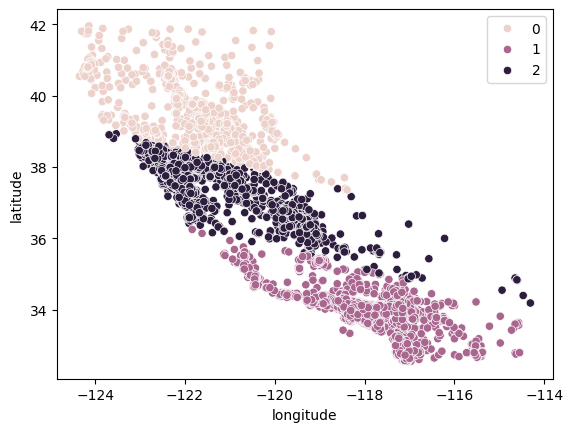

In [11]:
import seaborn as sns
sns.scatterplot(data = X_train, x = 'longitude', y= 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

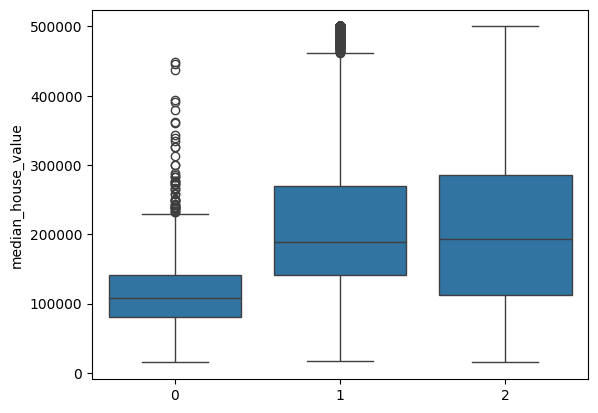

In [12]:
sns.boxplot(x = kmeans.labels_, y = 
y_train['median_house_value'])

In [13]:
from sklearn.metrics import silhouette_score 
silhouette_score(X_train_norm, kmeans.labels_, 
metric='euclidean')

0.7491460721562755

In [17]:
K = range(2, 8) 
fits = [] 
score = [] 
for k in K: 
    # melatih model untuk nilai k saat ini pada data pelatihan
model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm) 
# menambahkan model agar sesuai 
fits.append(model) 
# menambahkan silhouette score 
score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean')) 
sns.lineplot(x = K, y = score) 

IndentationError: expected an indented block after 'for' statement on line 4 (384266179.py, line 6)